## Data Collection

The task at hand is to analyze the data of the top rated dresses at the famous online shop, Shein, our primary source of data is the global Shein website. The follwong link is for the dresses page with the sorting based on rating:  

https://www.shein.com/Women-Dresses-c-1727.html?adp=28869201&categoryJump=true&ici=www_tab03navbar03menu01dir05&src_identifier=fc%3DWomen%20Clothing%60sc%3DWomen%20Clothing%60tc%3DShop%20by%20category%60oc%3DDresses%60ps%3Dtab03navbar03menu01dir05%60jc%3Dreal_1727&src_module=topcat&src_tab_page_id=page_home1710957580759&sort=7  

the collection of data took place at 19/03/2024 in the span of approximately 5 hours.  

Since Shein website is dynamic like most of the websites that made us resort to using Selenium, that is an open-source automated testing tool primarily used for automating web applications. in the context of python, we used Selenium webDriver library along with Microsoft Edge driver to simulate user interactions which bypass the problem of dynamic websites.

scrabing dynamic websites introduce many challenges that may be lesser or doesn't exist in static websites, the challenges that we faced are:  
1.  the scrabing process depend highly on the loading time of the website, that is if a specific element in the website loaded slower than the time constraint that are specified in the code, the process will fail resulting in a runtime error.  
2. To guard against bots and potintial attackers, Shein has a CAPTHCA that may appear once in a while, so, a person must attend the process the whole time so that when a CAPTCHA appear that person can perform the verfication herself.  
3. The time taken to complete the entire process was excessive.  
4. We needed some time to familiarize ourselves with Selenium since it's a new tool for us.  

The collecting process was devided into two parts:
1. collecting the URLs in a file.  
2. Scrabing each of the link.





## Code

### Imports & downloads

In [1]:
# uncomment if the libraries are not downloaded.

#%pip install selenium
#%pip install webdriver-manager

from selenium.common.exceptions import TimeoutException
from selenium import webdriver
from selenium.webdriver.chrome.service import Service as ChromeService
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.common.exceptions import TimeoutException
from selenium import webdriver
from selenium.webdriver.edge.service import Service
from webdriver_manager.microsoft import EdgeChromiumDriverManager
import time
import pandas as pd
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.dummy import DummyRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from math import sqrt






### Collecting URLs

In [ ]:

links=[]
totalLinks=0


for i in range(1,14):
    l="https://www.shein.com/Women-Dresses-c-1727.html?adp=28045547&categoryJump=true&ici=www_tab03navbar03menu01dir05&src_identifier=fc%3DWomen%20Clothing%60sc%3DWomen%20Clothing%60tc%3DShop%20by%20category%60oc%3DDresses%60ps%3Dtab03navbar03menu01dir05%60jc%3Dreal_1727&src_module=topcat&src_tab_page_id=page_home1710836812106&sort=7&page="+str(i)
    links.append(l)
    





service = Service(EdgeChromiumDriverManager().install())

# Initialize the Edge WebDriver with the service
driver = webdriver.Edge(service=service)
driver.get("https://www.shein.com")
time.sleep(5)


script = "document.querySelector('#txt_lang').click()"
driver.execute_script(script)


for url in links :
    
    driver.get(url)
    
    time.sleep(10)
    
    
    elements = driver.find_elements(By.CSS_SELECTOR, '.goods-title-link')
    
        
    
    totalLinks+=len(elements)
    



    with open("links.txt","a") as file:
        for link in elements:
         file.write(link.get_attribute("href")+"\n")
         


    
driver.quit()
print("total: ",totalLinks)

The links that we collected are included in the file links.txt

### Scrabing

In [ ]:



with open("sheinDresses10.csv","a") as file:
    file.write("Rating,Final Price,Discount,Number of Reviews,Material,Color,Style,Type,Brand\n")

service = Service(EdgeChromiumDriverManager().install())

# Initialize the Edge WebDriver with the service
driver = webdriver.Edge(service=service)
driver.maximize_window()
driver.get("https://www.shein.com/SHEIN-Qutie-Polo-Collar-Drop-Shoulder-Letter-Graphic-Pullover-p-11505778-cat-1773.html?src_identifier=fc%3DWomen%20Clothing%60sc%3DWomen%20Clothing%60tc%3D0%60oc%3D0%60ps%3Dtab03navbar03%60jc%3DitemPicking_017172961&src_module=topcat&src_tab_page_id=page_goods_detail1708318659597&mallCode=1&imgRatio=3-4")



element = WebDriverWait(driver,20).until(EC.presence_of_element_located((By.CSS_SELECTOR, '#txt_lang')))
               

script = "document.querySelector('#txt_lang').click()"
driver.execute_script(script) 
time.sleep(7)




urls=[]

with open("links10.txt","r") as urls:

    for i,url in enumerate(urls) :


        try:

        
            driver.get(url)




            

           

            element = WebDriverWait(driver,40).until(EC.presence_of_element_located((By.CSS_SELECTOR, '.name-line .title')))
            element = WebDriverWait(driver,20).until(EC.presence_of_element_located((By.CSS_SELECTOR, 'div.rate-num')))
            element = WebDriverWait(driver,20).until(EC.presence_of_element_located((By.CSS_SELECTOR, '.product-intro__description-table-item')))
            

            

           

            
            
            
            
            descriptions = driver.find_elements(By.CSS_SELECTOR, '.product-intro__description-table-item')
            
            






            color="" 
            discount="0"
            material=""
            type=""
            style=""
            brand=""
            globalRating="0"
            finalPrice="0"
            numOfRev="0"

            for line in descriptions:
                try:
                    key = line.find_element(By.CSS_SELECTOR, '.key').get_attribute("innerHTML")
                except:
                    continue
                
                if "Color" in key:
                    color=line.find_element(By.CSS_SELECTOR, '.val').get_attribute('innerText')
                elif "Material" in key:
                    material=line.find_element(By.CSS_SELECTOR, '.val').get_attribute('innerText')
                elif (key=="Type: "):
                    type=line.find_element(By.CSS_SELECTOR, '.val').get_attribute('innerText')
                elif (key=="Style: "):
                    style=line.find_element(By.CSS_SELECTOR, '.val').get_attribute('innerText')


            if(color=="" or material=="" or type=="" or style==""):
                    continue
                

           

            try:
                finalPrice=driver.find_element(By.CSS_SELECTOR, '.original span').get_attribute('innerText')
            
            except:
                finalPrice=driver.find_element(By.CSS_SELECTOR, '.discount.from span').get_attribute('innerText')
                discount=driver.find_element(By.CSS_SELECTOR, '.discount-label').get_attribute('innerText')
                    

           
                



           



           
            globalRating=driver.find_element(By.CSS_SELECTOR, 'div.rate-num').get_attribute('innerText')
            

           


            try:
                brand = driver.find_element(By.CSS_SELECTOR, '.name-line .title').get_attribute('innerText')
            except Exception as e:
                
                    brand = driver.find_element(By.CSS_SELECTOR, '.product-intro__brand-title').get_attribute('innerText')
               



            
            numOfRev=driver.find_element(By.CSS_SELECTOR, ".product-intro__head-reviews-text").get_attribute('innerText')
           






            
            

            strings=[url,color,material,type,style,brand,numOfRev]
            for i in range(len(strings)):
                strings[i] = strings[i].replace(",", "-")



            print(strings[0]+"\n"+strings[1]+"\n"+strings[2]+"\n"+strings[3]+"\n"+strings[4]+"\n"+strings[5]+"\n"+strings[6]+"\n"+finalPrice+"\n"+discount+"\n"+str(globalRating)+"\n")
            print("\n\n\n")


            with open("sheinDresses.csv","a") as file:
                strings[0]=strings[0].replace('\n', '')
                
                file.write(+str(globalRating)+","+finalPrice+","+discount+","+strings[6]+","+strings[2]+","+strings[1]+","+strings[4]+","+strings[3]+","+strings[5]+"\n")
               

        except Exception as e:
            continue


driver.quit()

Due to resources constraints and limited computational power, we made the decision to limit our dataset to 1215 rows. This decision allows us to gather sufficient data to derive meaningful insights while ensuring that our analysis remains manageable and doesn't strain our computer and takes too much time. This approach enables us to efficiently utilize available resources while still gaining valuable understanding from our data. The raw data that we collected are in the file SheinDresses.csv.

## Data Overview 

First we will read and transform the data into a dataframe using pandas library and we will print it to viewing it.

In [3]:
# Read the CSV file into a Pandas DataFrame
df = pd.read_csv('dressesBefore.csv', encoding = 'ISO-8859-1')
df

,Rating,Final Price,Discount,Number of Reviews,Material,Color,Style,Type,Brand
0,5.00,$7.0,-0%,(1000+ Reviews),Fabric,Lilac Purple,Boho,Cami,SHEIN ICON
1,5.00,$12.8,-20%,(1000+ Reviews),Fabric,Black,Sexy,Bodycon,SHEIN Belle
2,5.00,$16.8,-20%,(1000+ Reviews),Fabric,Black,Elegant,Shirt,SHEIN BAE
3,5.00,$14.45,-15%,(1000+ Reviews),Knitted Fabric,Blue,Sexy,Bodycon,SHEIN privé
4,5.00,$8.8,-20%,(1000+ Reviews),Woven Fabric,Khaki,Casual,Tunic,SHEIN Frenchy
...,...,...,...,...,...,...,...,...,...
1210,4.96,$20.0,-0%,(1000+ Reviews),Mesh Fabric,Black,Sexy,Bodycon,SHEIN Aloruh
1211,4.95,$23.0,-0%,(1000+ Reviews),Metallic,Navy Blue,Elegant,Fitted,SHEIN Modely
1212,4.94,$12.0,-20%,(1000+ Reviews),Knitted Fabric,Coffee Brown,Casual,Cami,SHEIN EZwear
1213,4.95,$16.0,-0%,(100+ Reviews),Woven Fabric,Red,Casual,A Line,SHEIN Unity


### Original dataset
we will keep a copy of the original data before data cleaning and prepr

In [4]:
originalDf = df
originalDf

,Rating,Final Price,Discount,Number of Reviews,Material,Color,Style,Type,Brand
0,5.00,$7.0,-0%,(1000+ Reviews),Fabric,Lilac Purple,Boho,Cami,SHEIN ICON
1,5.00,$12.8,-20%,(1000+ Reviews),Fabric,Black,Sexy,Bodycon,SHEIN Belle
2,5.00,$16.8,-20%,(1000+ Reviews),Fabric,Black,Elegant,Shirt,SHEIN BAE
3,5.00,$14.45,-15%,(1000+ Reviews),Knitted Fabric,Blue,Sexy,Bodycon,SHEIN privé
4,5.00,$8.8,-20%,(1000+ Reviews),Woven Fabric,Khaki,Casual,Tunic,SHEIN Frenchy
...,...,...,...,...,...,...,...,...,...
1210,4.96,$20.0,-0%,(1000+ Reviews),Mesh Fabric,Black,Sexy,Bodycon,SHEIN Aloruh
1211,4.95,$23.0,-0%,(1000+ Reviews),Metallic,Navy Blue,Elegant,Fitted,SHEIN Modely
1212,4.94,$12.0,-20%,(1000+ Reviews),Knitted Fabric,Coffee Brown,Casual,Cami,SHEIN EZwear
1213,4.95,$16.0,-0%,(100+ Reviews),Woven Fabric,Red,Casual,A Line,SHEIN Unity


### General information about the data:

we will write some code to take an overview about our data to understand it.


In [5]:
random_sample = df.sample(n=5, random_state=60)
print(random_sample)

df.shape # no. of rows and columns 

      Rating Final Price Discount Number of Reviews  Material          Color  \
1204    4.96       $13.8     -40%      (26 Reviews)   Fabric     Multicolor    
978     4.89       $25.0      -0%      (19 Reviews)   Fabric          Black    
275     4.95       $28.0      -0%   (1000+ Reviews)   Fabric   Burnt Orange    
513     4.84       $15.0      -0%   (1000+ Reviews)  Chiffon          White    
1051    5.00       $26.0      -0%   (1000+ Reviews)    Satin   Coffee Brown    

         Style     Type        Brand  
1204     Boho   A Line    SHEIN VCAY  
978   Elegant   A Line          Dazy  
275      Boho     Cami    SHEIN Tall  
513    Casual   A Line   SHEIN privé  
1051  Elegant     Cami       PARTHEA  


(1215, 9)

we display a random sample of 5 rows from the DataFrame using sample() method and we use the random_state parameter to obtain the same random sample every time we run the code

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1215 entries, 0 to 1214
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Rating             1215 non-null   float64
 1   Final Price        1215 non-null   object 
 2   Discount           1215 non-null   object 
 3   Number of Reviews  1215 non-null   object 
 4   Material           1215 non-null   object 
 5   Color              1215 non-null   object 
 6   Style              1215 non-null   object 
 7   Type               1215 non-null   object 
 8   Brand              1215 non-null   object 
dtypes: float64(1), object(8)
memory usage: 85.6+ KB


#### our data has :

No. of attributes: 9

Type of attributes: Ordinal , Nominal, and Numeric

No. of objects: 1215

## Data cleaning and preprocessing

1- Delete some symbols and replace them in the Final Price, Discount, and Number of Reviews columns. 

2- Drop some columns. 

3- Convert Number of Reviews column into categorical. 

4- We will check if there are null or missing values in our data. 

5- View if there are duplicated rows. 


### Delete some symbols 

In [7]:
df['Final Price']=df['Final Price'].str.replace("$","") 
 
 
 
df['Discount']=df['Discount'].str.replace("%","") 
df['Discount']=df['Discount'].str.replace("-","") 
 
 
 
df["Number of Reviews"]=df["Number of Reviews"].str.replace("Reviews","") 
df["Number of Reviews"]=df["Number of Reviews"].str.replace("(","") 
df["Number of Reviews"]=df["Number of Reviews"].str.replace(")","")
df["Number of Reviews"]=df["Number of Reviews"].str.replace("+","")


df['Final Price']=df['Final Price'].astype(float) 
df['Discount']=df['Discount'].astype(float)
df["Number of Reviews"]=df["Number of Reviews"].astype(float)

df['Brand'] = df['Brand'].str.replace('\xa0', ' ')
df

,Rating,Final Price,Discount,Number of Reviews,Material,Color,Style,Type,Brand
0,5.00,7.00,0.0,1000.0,Fabric,Lilac Purple,Boho,Cami,SHEIN ICON
1,5.00,12.80,20.0,1000.0,Fabric,Black,Sexy,Bodycon,SHEIN Belle
2,5.00,16.80,20.0,1000.0,Fabric,Black,Elegant,Shirt,SHEIN BAE
3,5.00,14.45,15.0,1000.0,Knitted Fabric,Blue,Sexy,Bodycon,SHEIN privé
4,5.00,8.80,20.0,1000.0,Woven Fabric,Khaki,Casual,Tunic,SHEIN Frenchy
...,...,...,...,...,...,...,...,...,...
1210,4.96,20.00,0.0,1000.0,Mesh Fabric,Black,Sexy,Bodycon,SHEIN Aloruh
1211,4.95,23.00,0.0,1000.0,Metallic,Navy Blue,Elegant,Fitted,SHEIN Modely
1212,4.94,12.00,20.0,1000.0,Knitted Fabric,Coffee Brown,Casual,Cami,SHEIN EZwear
1213,4.95,16.00,0.0,100.0,Woven Fabric,Red,Casual,A Line,SHEIN Unity


We deleted or replaced these symbols $, %, -, (, ) ,and the word reviews with "" (replaced with nothing to just delete them without remove or replacad the row with null) from the Final Price, Discount, and Number of Reviews columns respectively, so that we could convert them to float and be able to deal with them easily and analyze them well.

In Python and when performing web scraping, \xa0 may appear which is a character escape sequence that represents a non-breaking space if the website use it in HTML.

The character \xa0 appear in our data specifically in Brand column so we handle this by using replace() method to replace the character \xa0 with regular space ' ' .

### Drop some columns 

In [8]:
df.drop(columns=['Style', 'Type'], inplace=True)
df

,Rating,Final Price,Discount,Number of Reviews,Material,Color,Brand
0,5.00,7.00,0.0,1000.0,Fabric,Lilac Purple,SHEIN ICON
1,5.00,12.80,20.0,1000.0,Fabric,Black,SHEIN Belle
2,5.00,16.80,20.0,1000.0,Fabric,Black,SHEIN BAE
3,5.00,14.45,15.0,1000.0,Knitted Fabric,Blue,SHEIN privé
4,5.00,8.80,20.0,1000.0,Woven Fabric,Khaki,SHEIN Frenchy
...,...,...,...,...,...,...,...
1210,4.96,20.00,0.0,1000.0,Mesh Fabric,Black,SHEIN Aloruh
1211,4.95,23.00,0.0,1000.0,Metallic,Navy Blue,SHEIN Modely
1212,4.94,12.00,20.0,1000.0,Knitted Fabric,Coffee Brown,SHEIN EZwear
1213,4.95,16.00,0.0,100.0,Woven Fabric,Red,SHEIN Unity


Since there is some columns we don't need like the Style and Type and they do not answer our questions, we decided to drop them using drop() method to focus on our goal and the columns that will benefit us in analyzing and answering questions

In [9]:
data = df["Number of Reviews"]

# Define bin edges
bin_edges = [0, 99, 499, 999, 9999, float('inf')]

# Define bin labels
labels = ['0-99', '100-499', '500-999', '1000-9999', '10000 and above']

# Convert numeric column to categorical bins
categories = pd.cut(data, bins=bin_edges, labels=labels)

# replace the existing column Number of Reviews with the new one categories

df["Number of Reviews"] = categories

df

,Rating,Final Price,Discount,Number of Reviews,Material,Color,Brand
0,5.00,7.00,0.0,1000-9999,Fabric,Lilac Purple,SHEIN ICON
1,5.00,12.80,20.0,1000-9999,Fabric,Black,SHEIN Belle
2,5.00,16.80,20.0,1000-9999,Fabric,Black,SHEIN BAE
3,5.00,14.45,15.0,1000-9999,Knitted Fabric,Blue,SHEIN privé
4,5.00,8.80,20.0,1000-9999,Woven Fabric,Khaki,SHEIN Frenchy
...,...,...,...,...,...,...,...
1210,4.96,20.00,0.0,1000-9999,Mesh Fabric,Black,SHEIN Aloruh
1211,4.95,23.00,0.0,1000-9999,Metallic,Navy Blue,SHEIN Modely
1212,4.94,12.00,20.0,1000-9999,Knitted Fabric,Coffee Brown,SHEIN EZwear
1213,4.95,16.00,0.0,100-499,Woven Fabric,Red,SHEIN Unity


Categorizing numerical data allows us to simplify and summarize the information. Instead of dealing with a large range of numeric values, we can group them into meaningful categories, which can make the data more manageable and easier to interpret. This is why we converted the Number of Reviews column into categories.

### Missing values 

In [10]:
df.isnull().sum()

Rating               0
Final Price          0
Discount             0
Number of Reviews    0
Material             0
Color                0
Brand                0
dtype: int64

in our data there is no null values.

###  Duplicated rows

In [11]:
print('no. of duplicated rows is:  ', df.duplicated().sum())

print('\n' , df[df.duplicated()])

no. of duplicated rows is:   5

       Rating  Final Price  Discount Number of Reviews Material        Color  \
232      5.0          8.0      20.0         1000-9999  Fabric   Multicolor    
534      5.0         16.0       0.0         1000-9999  Fabric   Multicolor    
772      5.0         14.0       0.0         1000-9999  Fabric          Red    
990      5.0         25.0       0.0         1000-9999  Fabric   Multicolor    
1085     5.0         11.5      18.0         1000-9999  Fabric        Black    

              Brand  
232     SHEIN privé  
534      SHEIN VCAY  
772     SHEIN privé  
990   SHEIN Mulvari  
1085   SHEIN EZwear  


The dataframe df contains a five duplicated rows with the values above.

In collecting data by web scraping , sometimes there are duplication data, maybe because some error occurred during the collection or there are inconsistencies in the source data and because of this we assume that this is the reason for duplication of some rows.

Therefore, since we have a sufficient number of rows, we will delete the duplicate rows so that it does not affect our analysis of the data in the future.

In [12]:
df  = df.drop_duplicates()

print('no. of duplicated rows is:  ', df.duplicated().sum()) # to check if it delete or not


no. of duplicated rows is:   0


Now the duplicated rows was deleted and the no. of rows is 1210 and no. of columns is 7.

#### Now we will save it into csv file.

In [13]:
df.to_csv('sheinDresses_clean.csv', index=False)

## EDA

In [2]:
df2 = pd.read_csv('sheinDresses_clean.csv', encoding = 'ISO-8859-1')
df2

,Rating,Final Price,Discount,Number of Reviews,Material,Color,Brand
0,5.00,7.00,0.0,1000-9999,Fabric,Lilac Purple,SHEIN ICON
1,5.00,12.80,20.0,1000-9999,Fabric,Black,SHEIN Belle
2,5.00,16.80,20.0,1000-9999,Fabric,Black,SHEIN BAE
3,5.00,14.45,15.0,1000-9999,Knitted Fabric,Blue,SHEIN privÃ©
4,5.00,8.80,20.0,1000-9999,Woven Fabric,Khaki,SHEIN Frenchy
...,...,...,...,...,...,...,...
1205,4.96,20.00,0.0,1000-9999,Mesh Fabric,Black,SHEIN Aloruh
1206,4.95,23.00,0.0,1000-9999,Metallic,Navy Blue,SHEIN Modely
1207,4.94,12.00,20.0,1000-9999,Knitted Fabric,Coffee Brown,SHEIN EZwear
1208,4.95,16.00,0.0,100-499,Woven Fabric,Red,SHEIN Unity


In [3]:
df2.describe() #for numerical columns

,Rating,Final Price,Discount
count,1210.000000,1210.000000,1210.000000
mean,4.948248,17.918653,6.873554
std,0.061890,8.670404,11.611211
min,4.200000,4.500000,0.000000
25%,4.920000,12.000000,0.000000
50%,4.960000,16.000000,0.000000
75%,5.000000,21.600000,15.000000
max,5.000000,75.000000,70.000000


The review of the Rating column reveals that customers are really happy, with a top score of 4.95 out of 5. The small spread shows that most ratings are close to this average indicating customer happiness. Even the happy customers scored a 4.2, which is above average. Most ratings are around 5 showing a strong liking for high satisfaction. This means that the things being reviewed are mostly liked and good, but there's still space to get better.

In [4]:
df2.describe(include=['O']) #include other categorical columns

,Number of Reviews,Material,Color,Brand
count,1210,1210,1210,1210
unique,4,19,59,87
top,1000-9999,Fabric,Multicolor,SHEIN VCAY
freq,573,462,215,158


The info shows SHEIN VCAY as top brand out of 87. Fabric is the favored material. Items typically receiving '1000-9999' reviews indicate high consumer approval. Consumers prefer fabric products from SHEIN VCAY.

In [6]:
# Select only numeric columns for correlation analysis
df_numeric = df2._get_numeric_data()
correlation_matrix = df_numeric.corr()

print(correlation_matrix)


               Rating  Final Price  Discount
Rating       1.000000    -0.087337  0.024357
Final Price -0.087337     1.000000 -0.314132
Discount     0.024357    -0.314132  1.000000


We can get that changes in Final prices have little impact on the Ratings, but Discounts lead to higher ratings. When examining data, we gain a better grasp of how pricing and promotions relate, showing that big discounts are common on items with higher starting prices.
But in general, the relationship between them is minimal

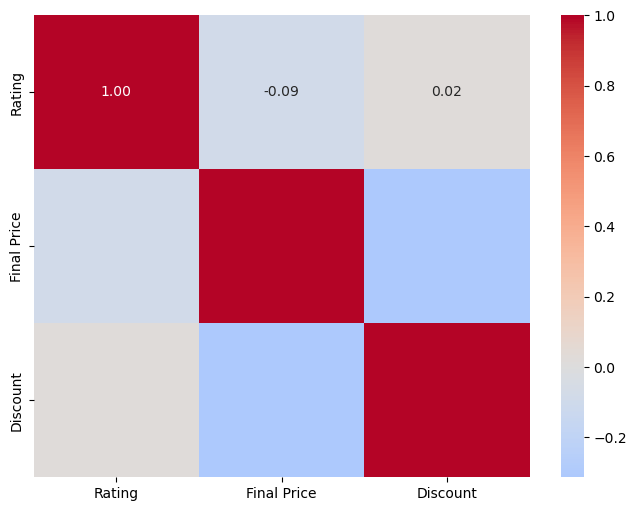

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set up the matplotlib figure
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', center=0)
plt.show()

The heat map shows that the realtionship among these three variables are generally weak, so when we make decisions of pricing and product promotion we consider this.

In [10]:
df2['Rating'].describe()

count    1210.000000
mean        4.948248
std         0.061890
min         4.200000
25%         4.920000
50%         4.960000
75%         5.000000
max         5.000000
Name: Rating, dtype: float64

In [11]:
df2['Rating'].value_counts()

Rating
5.00    434
4.95    101
4.96     84
4.93     72
4.94     70
4.92     61
4.91     54
4.97     52
4.89     46
4.98     45
4.90     43
4.87     25
4.88     20
4.86     17
4.84     14
4.99     14
4.85     11
4.83      9
4.81      6
4.80      6
4.82      4
4.79      3
4.78      3
4.74      3
4.77      2
4.75      2
4.61      1
4.72      1
4.20      1
4.67      1
4.71      1
4.58      1
4.70      1
4.68      1
4.40      1
Name: count, dtype: int64

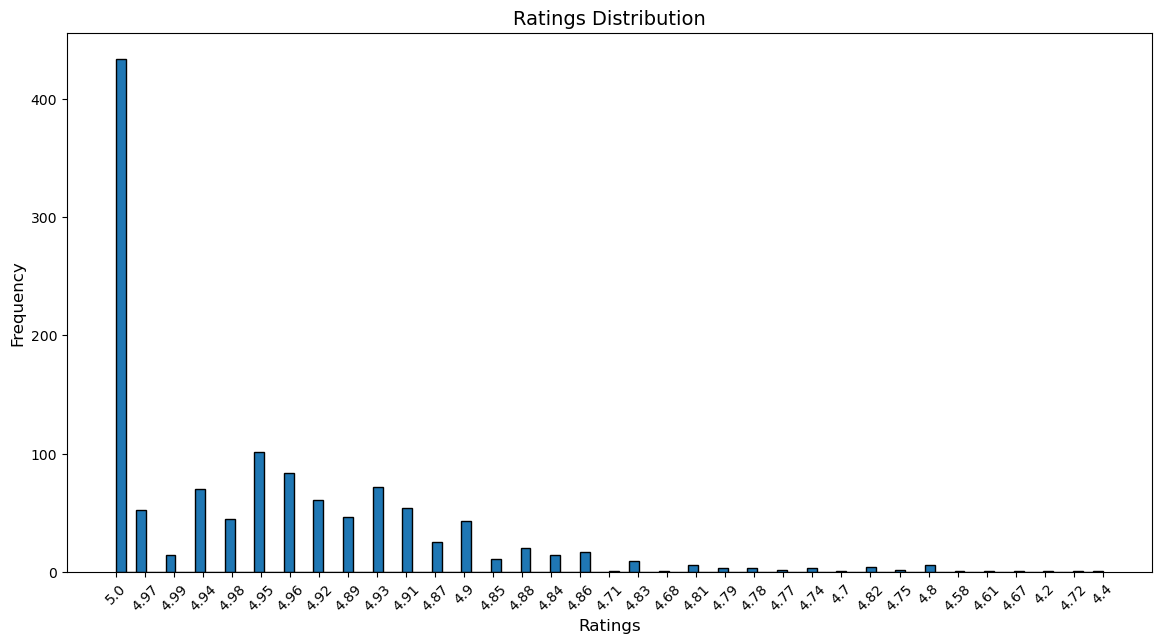

In [20]:
plt.figure(figsize=(14, 7))
plt.hist(df2['Rating'], bins=100, edgecolor='black')
plt.xticks(rotation=45)

plt.title('Ratings Distribution', fontsize=14)
plt.xlabel('Ratings', fontsize=12)
plt.ylabel('Frequency', fontsize=12)


plt.show()

The figure shows that most of the reviews have mainly received positive ratings, which is a sign of a high level of customer satisfaction and accordingly enhances the reputation of the web page.

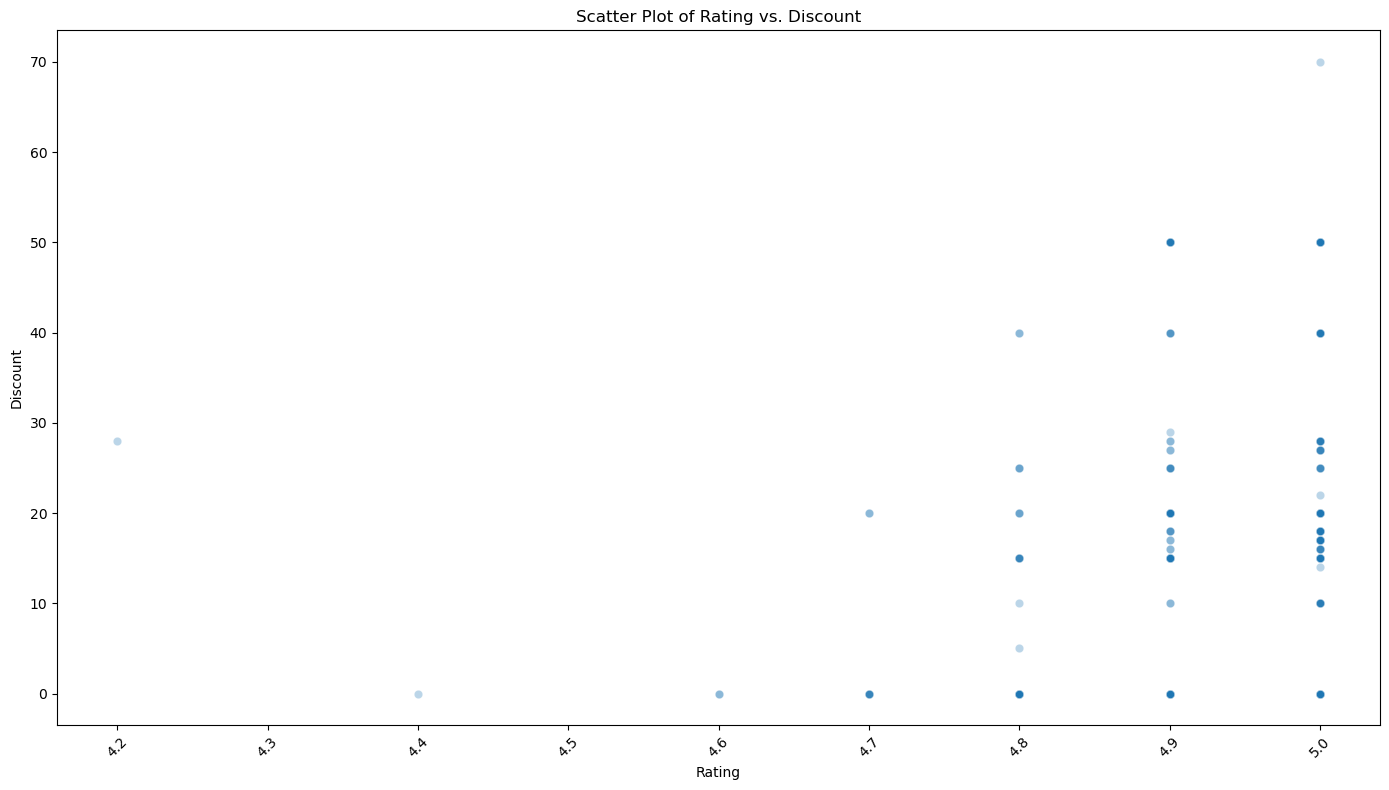

In [25]:
df2['Rating'] = pd.to_numeric(df2['Rating'], errors='coerce')

df2.dropna(subset=['Rating'], inplace=True)  # This line drops rows with NaN in 'Rating'
plt.figure(figsize=(14, 8))
df2['Rating_Rounded'] = df2['Rating'].round(1)

sns.scatterplot(x='Rating_Rounded', y='Discount', data=df2, alpha=0.3)
plt.xticks(rotation=45)
plt.title('Scatter Plot of Rating vs. Discount')
plt.xlabel('Rating')
plt.ylabel('Discount')
plt.tight_layout()
plt.show()

The data points are mainly at the lower end of the discount range, which shows that there is lack of high discounts regardless of valuation

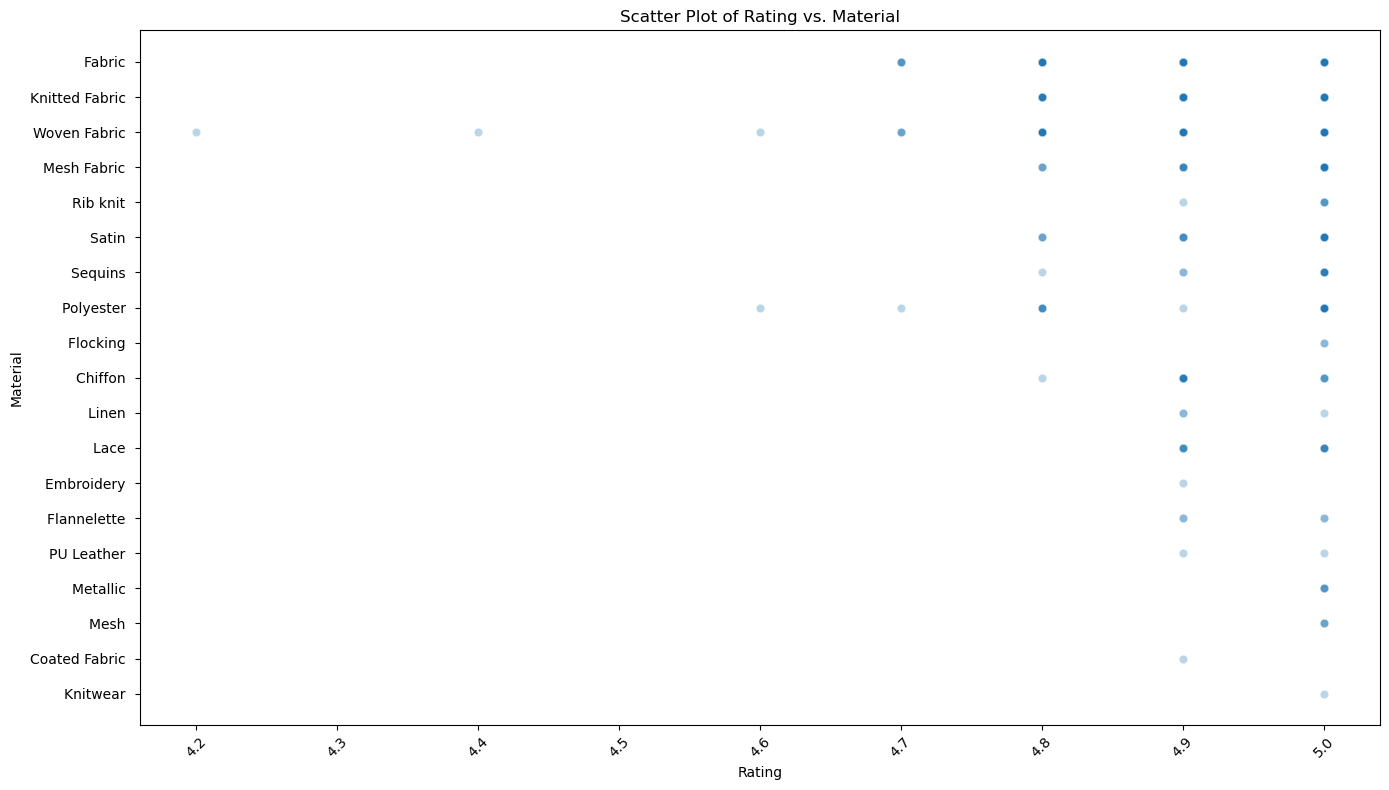

In [28]:
df2['Rating'] = pd.to_numeric(df2['Rating'], errors='coerce')

df2.dropna(subset=['Rating'], inplace=True)  # This line drops rows with NaN in 'Rating'
plt.figure(figsize=(14, 8))
df2['Rating_Rounded'] = df2['Rating'].round(1)

sns.scatterplot(x='Rating_Rounded', y='Material', data=df2, alpha=0.3)
plt.xticks(rotation=45)
plt.title('Scatter Plot of Rating vs. Material')
plt.xlabel('Rating')
plt.ylabel('Material')
plt.tight_layout()
plt.show()

The chart gives a connection between ratings and material. It seems there are varying ratings for different fabrics where one can’t identify a pattern that relates the type of material to the rating given. Some such as chiffon and knit are characterized with divergent ratings as demonstrated by the available data, while others like satin and faux leather exhibit higher concentration of high scores.

In [3]:
file_path = 'sheinDresses_clean.csv'

df = pd.read_csv(file_path)


An interesting question that can be answered using our dataset is:
How do different characteristics of Shein products influence their pricing? To answer this question, we will create a model that predicts the price based on the features of the dataset. This predictive model will help us understand the underlying patterns driving pricing decisions and inform strategic pricing strategies for Shein's product offerings.

### encoding categorical columns

Since the algorithms we will be using only accept numerical values, we will first encode the categorical columns.

In [4]:
label_encoder = LabelEncoder()

encoded_materials = label_encoder.fit_transform(df['Material'])

df['Material_encoded'] = encoded_materials




encoded_colors = label_encoder.fit_transform(df['Color'])

df['Color_encoded'] = encoded_colors



encoded_brands = label_encoder.fit_transform(df['Brand'])

df['Brand_encoded'] = encoded_brands



ordered_categories = {
    '0-99': 0,
    '100-499': 1,
    '500-999': 2,
    '1000-9999': 3
}

df['Number of Reviews_encoded'] = df['Number of Reviews'].map(ordered_categories)

df2 = df.drop(columns=['Color', 'Material', 'Brand', 'Number of Reviews'])



## baseline model  

our starting point in creating models is the baseline model, which is a model that is not excpected to perform well, but rather it will not even consider the features for the prediction.  Its sole purpose is to provide a reference point against which the performance of subsequent, more sophisticated models can be evaluated. For regression tasks, a variety of approaches can be employed to construct a baseline model, including the utilization of median, mean, a specific quartile, or a constant value. here, we will use the mean as our baseline model.

In [5]:



X = df2.drop(columns=['Final Price'])
y = df2['Final Price']  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

dummy_reg = DummyRegressor(strategy='mean')
dummy_reg.fit(X_train, y_train)
y_pred = dummy_reg.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print("MES:", mse)

print("RMSE:", sqrt(mse).real)

mae = mean_absolute_error(y_test, y_pred)
print("MAE:", mae)

r_squared = r2_score(y_test, y_pred)
print("R-squared (R²):", r_squared)




MES: 64.97582022421814
RMSE: 8.060758042778492
MAE: 5.975645390797532
R-squared (R²): -0.0008585072553926043


We will explore various algorithms, including Linear Regression, Ridge Regression, and Gradient Boosting Regressor, then determine the most effective one based on evaluation metrics(MSE, MAE, RMSE, R²). on all models we will be using 60% train and 40% test.

### Linear Regression  

A simple algorithm that models a linear 
relationship between inputs and a continuous 
numerical output variable, and it assumes linearity between inputs and outpu


In [6]:





regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

y_pred = regression_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print("MES:", mse)

print("RMSE:", sqrt(mse).real)

mae = mean_absolute_error(y_test, y_pred)
print("MAE:", mae)

r_squared = r2_score(y_test, y_pred)
print("R-squared (R²):", r_squared)





MES: 48.55052913229349
RMSE: 6.967820974472112
MAE: 5.212398245946431
R-squared (R²): 0.25214933884443425


Based on the metrics, the created regression model is better that the baseline model which is the bare minimum, but it still perform poorly and may need futher refinement and adjustments

### Ridge Regression
here we will use Ridge Regression, the main diffrence between it and linear Regression is that  it penalizes 
features that have low predictive outcomes by 
shrinking their coefficients closer to zero which makes it less prone to overfitting.

In [7]:
ridge_model = Ridge(alpha=1.0)  
ridge_model.fit(X_train, y_train)
y_pred = ridge_model.predict(X_test)


mse = mean_squared_error(y_test, y_pred)
print("MES:", mse)

print("RMSE:", sqrt(mse).real)

mae = mean_absolute_error(y_test, y_pred)
print("MAE:", mae)

r_squared = r2_score(y_test, y_pred)
print("R-squared (R²):", r_squared)



MES: 48.59973523546158
RMSE: 6.971351033728081
MAE: 5.216263761446226
R-squared (R²): 0.25139139001370425


The ridge model performance is almost identical to the linear regression model, both show poor performance

### Gradient Boosting Regressor

This algorithm uses weak learners in a sequence to produce a robust model. it find any nonlinear relationship between the target and features.

In [8]:

gb_model = GradientBoostingRegressor()

gb_model.fit(X_train, y_train)

y_pred = gb_model.predict(X_test)


mse = mean_squared_error(y_test, y_pred)
print("MES:", mse)

print("RMSE:", sqrt(mse).real)

mae = mean_absolute_error(y_test, y_pred)
print("MAE:", mae)

r_squared = r2_score(y_test, y_pred)
print("R-squared (R²):", r_squared)







MES: 31.17536334813911
RMSE: 5.583490247877139
MAE: 4.20315619156762
R-squared (R²): 0.5197886303537087


This model shows clear improvments compared to the two prevoius models, This is evidenced by its lower MSE and MAE values, indicative of a higher predictive accuracy. Moreover, the Gradient Boosting Regressor demonstrates a higher R-squared (R²) value, signifying its ability to explain a larger proportion of variance in the dependent variable(Final Price) that can be explained by the independent variable compared to the other models. These findings suggest that the Gradient Boosting Regressor offers the most robust predictive performance and explanatory power.  

Even though the Gradient Boosting Regressor model showed the best performance among the models, there is still room for improvement by gathering more data, using different splitting methods, different configurations or using other models.